<a href="https://colab.research.google.com/github/jamesharrison2005/Analysis-on-the-Prevalence-of-Covid-19/blob/main/Growth_and_prevalence_of_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The objective of this project is to *analyse* how COVID-19 spread across countries over time, identify periods of rapid growth, compare prevalence and mortality rates, and uncover regional differences.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/owid-covid-data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning
Converting date feature into datetime

In [16]:
df['date'] = pd.to_datetime(df['date'])
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    350085 non-null  object        
 1   continent                                   333420 non-null  object        
 2   location                                    350085 non-null  object        
 3   date                                        350085 non-null  datetime64[ns]
 4   total_cases                                 312088 non-null  float64       
 5   new_cases                                   340457 non-null  float64       
 6   new_cases_smoothed                          339198 non-null  float64       
 7   total_deaths                                290501 non-null  float64       
 8   new_deaths                                  340511 non-null  float64      

In [18]:
df.describe()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,350085,3.120880e+05,3.404570e+05,3.391980e+05,2.905010e+05,340511.000000,339281.000000,312088.000000,340457.000000,339198.000000,...,200889.000000,132973.000000,239669.000000,322072.000000,263138.000000,3.500850e+05,1.218400e+04,12184.000000,12184.000000,12184.000000
mean,2021-11-25 18:35:40.040275712,6.683354e+06,9.601634e+03,9.637066e+03,8.602180e+04,85.511055,85.817071,101749.851259,145.163814,145.696924,...,32.909483,50.789962,3.097245,73.713631,0.722464,1.284633e+08,5.281637e+04,9.738648,11.345256,1669.025575
min,2020-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2752.924800
25%,2020-12-16 00:00:00,8.090000e+03,0.000000e+00,2.860000e-01,1.270000e+02,0.000000,0.000000,2595.577500,0.000000,0.044000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.202250e+02,1.400000,-1.600000,72.395046
50%,2021-11-26 00:00:00,7.020500e+04,2.000000e+00,2.485700e+01,1.328000e+03,0.000000,0.143000,28307.659000,0.128000,6.517000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,5.885850e+03,8.075000,5.720000,1105.404700
75%,2022-11-06 00:00:00,7.409558e+05,2.640000e+02,4.978570e+02,1.192200e+04,3.000000,5.143000,133506.244000,35.466000,82.411000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.742344e+04,15.360000,16.302500,2740.130200
max,2023-10-24 00:00:00,7.714071e+08,8.401961e+06,6.402036e+06,6.972139e+06,27939.000000,14822.000000,737554.506000,228872.025000,37241.781000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.289776e+06,76.620000,377.630000,10292.916000
std,NaN,4.068903e+07,1.102769e+05,9.447784e+04,4.398873e+05,613.687971,559.130004,151265.689121,1163.714678,599.957847,...,13.573767,31.956100,2.548327,7.395220,0.148976,6.607694e+08,1.492195e+05,12.304441,25.181297,1938.556228


Gaining an understanding of the unique values in each column, as well as identifying any data that may need to be cleaned. Data is already sorted by location and date so sorting is unecessary. Undefined data is already replaced using NaN.

In [19]:
null_mask = df.isnull().any(axis=1)
null_data = df[null_mask]
null_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350080,ZWE,Africa,Zimbabwe,2023-10-14,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350081,ZWE,Africa,Zimbabwe,2023-10-15,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350082,ZWE,Africa,Zimbabwe,2023-10-16,265808.0,0.0,5.286,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
350083,ZWE,Africa,Zimbabwe,2023-10-17,265808.0,0.0,0.000,5718.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Checking if each population has a single population value

In [20]:
population_counts = df.groupby('location')['population'].nunique()
countries_with_multiple_populations = population_counts[population_counts > 1]

if not countries_with_multiple_populations.empty:
    print("Countries with multiple population values:")
    print(countries_with_multiple_populations)
else:
    print("Each country has a single population value.")

Each country has a single population value.


## New Creating new metrics

cases per 100k, deaths per 100k

In [21]:
df['cases_per_100k'] = (df['total_cases'] / df['population']) * 100000
df['deaths_per_100k'] = (df['total_deaths'] / df['population']) * 1000


creating 7-day rolling averages

In [22]:
df_sorted = df.sort_values(by=['location', 'date'])
df['new_cases_rolling_avg'] = df_sorted.groupby('location')['new_cases'].rolling(window=7).mean().reset_index(level=0, drop=True)
df['new_deaths_rolling_avg'] = df_sorted.groupby('location')['new_deaths'].rolling(window=7).mean().reset_index(level=0, drop=True)

print(df[['location', 'date', 'new_cases', 'new_deaths', 'new_cases_rolling_avg', 'new_deaths_rolling_avg']].head(5))

      location       date  new_cases  new_deaths  new_cases_rolling_avg  \
0  Afghanistan 2020-01-03        0.0         0.0                    NaN   
1  Afghanistan 2020-01-04        0.0         0.0                    NaN   
2  Afghanistan 2020-01-05        0.0         0.0                    NaN   
3  Afghanistan 2020-01-06        0.0         0.0                    NaN   
4  Afghanistan 2020-01-07        0.0         0.0                    NaN   

   new_deaths_rolling_avg  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  


daily growth metric as a percentage

In [23]:

df['previous_day_total_cases'] = df_sorted.groupby('location')['total_cases'].shift(1)
df['daily_growth_rate'] = (df['new_cases'] / df['previous_day_total_cases']) * 100

print(df[['location', 'date', 'new_cases', 'total_cases', 'previous_day_total_cases', 'daily_growth_rate']])

           location       date  new_cases  total_cases  \
0       Afghanistan 2020-01-03        0.0          NaN   
1       Afghanistan 2020-01-04        0.0          NaN   
2       Afghanistan 2020-01-05        0.0          NaN   
3       Afghanistan 2020-01-06        0.0          NaN   
4       Afghanistan 2020-01-07        0.0          NaN   
...             ...        ...        ...          ...   
350080     Zimbabwe 2023-10-14        0.0     265808.0   
350081     Zimbabwe 2023-10-15        0.0     265808.0   
350082     Zimbabwe 2023-10-16        0.0     265808.0   
350083     Zimbabwe 2023-10-17        0.0     265808.0   
350084     Zimbabwe 2023-10-18        0.0     265808.0   

        previous_day_total_cases  daily_growth_rate  
0                            NaN                NaN  
1                            NaN                NaN  
2                            NaN                NaN  
3                            NaN                NaN  
4                            NaN 

Case fatality rate

In [24]:
df['case_fatality_rate'] = (df['total_deaths'] / df['total_cases']) * 100
print(df[['location', 'date', 'total_deaths', 'total_cases', 'case_fatality_rate']])

           location       date  total_deaths  total_cases  case_fatality_rate
0       Afghanistan 2020-01-03           NaN          NaN                 NaN
1       Afghanistan 2020-01-04           NaN          NaN                 NaN
2       Afghanistan 2020-01-05           NaN          NaN                 NaN
3       Afghanistan 2020-01-06           NaN          NaN                 NaN
4       Afghanistan 2020-01-07           NaN          NaN                 NaN
...             ...        ...           ...          ...                 ...
350080     Zimbabwe 2023-10-14        5718.0     265808.0            2.151177
350081     Zimbabwe 2023-10-15        5718.0     265808.0            2.151177
350082     Zimbabwe 2023-10-16        5718.0     265808.0            2.151177
350083     Zimbabwe 2023-10-17        5718.0     265808.0            2.151177
350084     Zimbabwe 2023-10-18        5718.0     265808.0            2.151177

[350085 rows x 5 columns]


In [25]:
#replace infinite
df.replace([np.inf,  -np.inf], np.nan, inplace=True)

# Data analysis
## Structure and Overview
- After creating new metrics there are 74 different features most of which are a float datatype however some are objects and one is datetime.
- The dataset includes a very large range of countries as well as all availible information on the growth ans spread of cases
- The dataset contains data from January 2020 until  October 2023. In early and late reports a lot data is Not applicable due to the decrease in prevalence

## Data Quality
 - Data quality is relatively high being sorted and consistent when addressing missing values
 - Rolling averages were created to avoid any negative values potentially caused by data revisions

## Global Trend analysis
- When does the global growth peak?
- Are there multiple waves visible?
- How do deaths compare to cases?

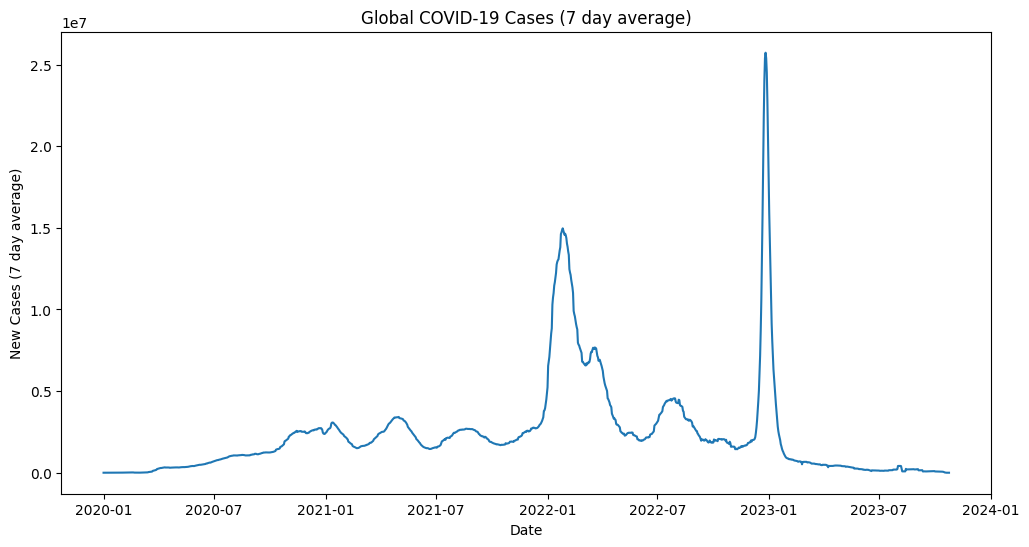

In [27]:
global_cases_by_date = df.groupby('date')['new_cases_rolling_avg'].sum()

plt.figure(figsize = (12,6))
plt.plot(global_cases_by_date)
plt.title('Global COVID-19 Cases (7 day average)')
plt.xlabel('Date')
plt.ylabel('New Cases (7 day average)')
plt.show()

From the graph we can Identify two main features that can help answer the questions we identfied earlier.

1. The global cases for COVID-19 peaked in January 2023 with 25 million cases globally
2. There are multiple waves visible demonstrating different spikes in prevalence with initial large increase in January to February of 2022 peaking at 15 million cases globally